1- Importing requests it allows you to send HTTP requests, without the need for manual labor. There's no need to manually add query strings to your URLs.

2- Importing getpass for a secure password prompt

3- Json is the exclusive format with which GitHub API sends data.

In [1]:
import requests
#from getpass import getpass
import json
from getpass import getpass
import pandas as pd
from github import Github
import networkx as nx
import numpy as np
import ast
import datetime
import matplotlib.pyplot as plt

Acquiring OAuth Token.. 

Quick reminder: OAuth is an open standard for access delegation, commonly used as a way for Internet users to grant websites or applications access to their information on other websites but without giving them the passwords.

In [6]:
token='a05e1dc037d4cbb5ec58bbba1c97e685847d86fe'

In [7]:
username = 'YoussefEssDS' #put ur Github user name here! 
password = 'Seek greatness1' #put ur Github password name here! 
#Credentials are transmitted over a secure SSL connection
url = 'https://api.github.com/authorizations'
note = 'Aquiring_token'
post_data = {'scopes':['repo'],'note': note }
response = requests.post(url,auth = (username, password),data = json.dumps(post_data),) # Mohim this response needs input in this format dunno why!
print("API response:", response.text)
#print("Your OAuth token is", response.json()['token'])


API response: {"message":"Validation Failed","errors":[{"resource":"OauthAccess","code":"already_exists","field":"note"}],"documentation_url":"https://developer.github.com/v3/oauth_authorizations/#create-a-new-authorization"}


For now we'll try to list a user's followers.

As you can see we choosed the Tensorflow repository as a target for our study.

In [8]:
repo_user='tensorflow'
repo='tensorflow'

We will extract monthly data for contribution to the tensorflow repository between 01/2019 & 06/2019.

GitHub identifies contributors by author email address. This endpoint groups contribution counts by GitHub user, which includes all associated email addresses. To improve performance, only the first 500 author email addresses in the repository link to GitHub users. The rest will appear as anonymous contributors without associated GitHub user information.

In [9]:
from_initial_followship_dict={}
to_initial_followship_dict={}
client = Github(token,per_page=100)
user = client.get_user(repo_user)
repo = user.get_repo(repo)

In [10]:
def createContrib(s,u):
    contributions = [ s for s in repo.get_commits(since=s,until=u)]
    contributors=[s.author for s in contributions]
    contributors=list(dict.fromkeys(contributors))
    #Some commits belong to users that don't have an account anymore, or changed it so when inquire the user would be NonType we have to eliminate those.
    contributors=[s for s in contributors if s!=None ]
    return(contributors)

In [11]:
def createFollwDict(contributors):
    from_initial_followship_dict={}
    to_initial_followship_dict={}
    for user in contributors:
        from_initial_followship_dict[user.login]=[follower for follower in user.get_followers()]
    for user in contributors:
        to_initial_followship_dict[user.login]=[followed for followed in user.get_following()]
    return(from_initial_followship_dict,to_initial_followship_dict)

In [65]:
def createFiArray(fromFollDict,toFollDict,date):
    l=np.ndarray(shape=(0,4),dtype=str)
    #Followers of contributors:
    for contributor in fromFollDict.keys():
        for follower in fromFollDict[contributor]:
            l=np.append(l,[[date,contributor,follower.login,"contributer"]],axis=0)

    #The followed by contributors:
    for contributor in toFollDict.keys():
        for followed in toFollDict[contributor]:
            if followed.login in toFollDict.keys():
                l=np.append(l,[[date,followed.login,contributor,"contributer"]],axis=0)
            else:
                l=np.append(l,[[date,followed.login,contributor,"non-contributer"]],axis=0)
    print('One month is done!')
    return(l)

In [13]:
contributors1=createContrib(datetime.datetime(2019,1,1),datetime.datetime(2019,2,1))
contributors2=createContrib(datetime.datetime(2019,2,1),datetime.datetime(2019,3,1))    
contributors3=createContrib(datetime.datetime(2019,3,1),datetime.datetime(2019,4,1))    
contributors4=createContrib(datetime.datetime(2019,4,1),datetime.datetime(2019,5,1))    
contributors5=createContrib(datetime.datetime(2019,5,1),datetime.datetime(2019,6,1))    

The number of contributors in each month are as follow:

1- January: 208 Contributor.

2- February: 216 Contributor.

3- March: 236 Contributor.

4- April: 240 Contributor.

5- May: 222 Contributor.

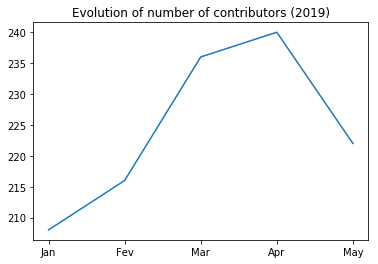

In [15]:
months=['Jan','Fev','Mar','Apr','May']
cont=[208,216,236,240,222]
plt.title('Evolution of number of contributors (2019)')
plt.plot(months,cont)

In [16]:
fromFollDict1,toFollDict1=createFollwDict(contributors1)
fromFollDict2,toFollDict2=createFollwDict(contributors2)

In [22]:
fromFollDict3,toFollDict3=createFollwDict(contributors3)

In [25]:
fromFollDict4,toFollDict4=createFollwDict(contributors4)
fromFollDict5,toFollDict5=createFollwDict(contributors5)

In [47]:
# Let's generate a dataframe that gives for each contributor the number of followers and followed Github users (for January for instance).
df=pd.DataFrame(columns=['Contributors','No. followers','No. followed'])
i=0
for cont in contributors1:
    l=[cont.login,len(fromFollDict1[cont.login]),len(toFollDict1[cont.login])]
    df.loc[i]=l
    i+=1
df

,Contributors,No. followers,No. followed
0,trevor-m,22,4
1,petewarden,1746,1
2,tensorflower-gardener,284,0
3,allenlavoie,194,0
4,alextp,404,4
5,akshaym,100,0
6,omalleyt12,5,0
7,aaroey,432,74
8,jaingaurav,19,5
9,timshen91,149,45


In [58]:
user=contributors1[0]
[follower for follower in user.get_followers()]
user.get_followers(s)

NamedUser(login="trevor-m")

In [66]:
l1=createFiArray(fromFollDict1,toFollDict1,'01-2019')
l2=createFiArray(fromFollDict2,toFollDict2,'02-2019')
l3=createFiArray(fromFollDict3,toFollDict3,'03-2019')
l4=createFiArray(fromFollDict4,toFollDict4,'04-2019')
l5=createFiArray(fromFollDict5,toFollDict5,'05-2019')

One month is done!
One month is done!
One month is done!
One month is done!
One month is done!


In [76]:
l=np.concatenate((l1,l2,l3,l4,l5))
l

array([['01-2019', 'trevor-m', 'Byron0221', 'contributer'],
       ['01-2019', 'trevor-m', 'ShayanPersonal', 'contributer'],
       ['01-2019', 'trevor-m', 'jonike', 'contributer'],
       ...,
       ['05-2019', 'thejollyrogers', 'joshbeal', 'non-contributer'],
       ['05-2019', 'vbuterin', 'joshbeal', 'non-contributer'],
       ['05-2019', 'odespo', 'joshbeal', 'non-contributer']], dtype='<U38')

In [80]:
followship_data_frame=pd.DataFrame(data=l,columns=['Date','To','From','To is contributor?'])
followship_data_frame=followship_data_frame.drop_duplicates(subset=['To','From'])
followship_data_frame

,Date,To,From,To is contributor?
0,01-2019,trevor-m,Byron0221,contributer
1,01-2019,trevor-m,ShayanPersonal,contributer
2,01-2019,trevor-m,jonike,contributer
3,01-2019,trevor-m,nazifberat,contributer
4,01-2019,trevor-m,JaredYeDH,contributer
5,01-2019,trevor-m,iancormac84,contributer
6,01-2019,trevor-m,asetsuna,contributer
7,01-2019,trevor-m,sonej,contributer
8,01-2019,trevor-m,Vishal2188,contributer
9,01-2019,trevor-m,shainaprasad,contributer


Let's save the dataframe in a csv file to avoid extracting everytime.

In [94]:
pd.DataFrame.to_csv(followship_data_frame,'MainDF.csv')

In [2]:
followship_data_frame=pd.read_csv('MainDF.csv')
followship_data_frame=followship_data_frame.drop('Unnamed: 0',axis=1)

In [3]:
followship_data_frame

,Date,To,From,To is contributor?
0,01-2019,trevor-m,Byron0221,contributer
1,01-2019,trevor-m,ShayanPersonal,contributer
2,01-2019,trevor-m,jonike,contributer
3,01-2019,trevor-m,nazifberat,contributer
4,01-2019,trevor-m,JaredYeDH,contributer
5,01-2019,trevor-m,iancormac84,contributer
6,01-2019,trevor-m,asetsuna,contributer
7,01-2019,trevor-m,sonej,contributer
8,01-2019,trevor-m,Vishal2188,contributer
9,01-2019,trevor-m,shainaprasad,contributer


In [4]:
G=nx.DiGraph()

### Very important note:

You must note that this dataframe as designed and as I choosed to create the Graph later on reflects my sole interest in the contributors of the 'tensorflow' repository, so you might find nodes in the graph representing non-contributing individuals but you'll never see them receiving an edge, in other words, in-degree for these users is 0. This conception came purely from the fact that I'm intrested in the social status of contributors within the software developpement community, as 'prestigious' members of it and their interest in each other (Other contributors). Studying the interests of these contributors is another subject for future projects. 

In [5]:
#Let's create this graph:
Gpool=[]
for i in range (0,len(followship_data_frame)):
    if (followship_data_frame.loc[followship_data_frame.index==i,'To is contributor?'].get_values()[0]=='contributer'):
        nodeF=followship_data_frame.loc[followship_data_frame.index==i,'From'].get_values()[0]
        nodeT=followship_data_frame.loc[followship_data_frame.index==i,'To'].get_values()[0]
        Gpool.append(nodeF)
        Gpool.append(nodeT)
        edge=(nodeF,nodeT)
        G.add_edge(*edge)

In [6]:
#Verification we didn't use same node multiple times.
print(len(G.node))
print(len(list(dict.fromkeys(Gpool))))

35573
35573


In [8]:
nx.write_gml(G, 'followshipnetwork.gml') #saving the graph as a GML file (Graphe markup language)

Let's attempt a visualization of the **intrest network for the contributors** of the Tensorflow repository and their followers, using the open source software **Cytoscape**.

As you can see bellow there is a sort of core-perephery structure, ie. there is a main center of the graph where nodes are highly connected (core) and outside, there is small groups or communities less connected the the core (perephery).

This is only from pure observation, we will try to verify this using a clustering algorithm eg. K-Means.

![image info](./Images/FullNet.png)


In [9]:
G=nx.read_gml('followshipnetwork.gml')
print(len(G.node))

35573


The above graph represent the full interest graph (interest here is defined as following a Github user) of contributors through the 5 months of this study. Now we will plot using cytoscape the monthly interest graphs. 

In [10]:
to=[]
for i in range (0,len(followship_data_frame)):
        if (followship_data_frame.loc[followship_data_frame.index==i,'To is contributor?'].get_values()[0]=='contributer'):
            to.append(followship_data_frame.loc[followship_data_frame.index==i,'To'].get_values()[0])

In [11]:
Lcontributors=list(dict.fromkeys(to))
len(Lcontributors)

433

In [7]:
def getMonthGraph(month):
    G=nx.DiGraph()
    for i in range (0,len(followship_data_frame)):
        nodeF=followship_data_frame.loc[followship_data_frame.index==i,'From'].get_values()[0]
        nodeT=followship_data_frame.loc[followship_data_frame.index==i,'To'].get_values()[0]
        if (nodeT in Lcontributors and followship_data_frame.loc[followship_data_frame.index==i,'Date'].get_values()[0]==month):
            edge=(nodeF,nodeT)
            G.add_edge(*edge)
    return(G)

In [8]:
GJan=getMonthGraph('01-2019')
GFev=getMonthGraph('02-2019')
GMar=getMonthGraph('03-2019')
GApr=getMonthGraph('04-2019')
GMay=getMonthGraph('05-2019')

In [9]:
print(len(GJan.node))
print(len(GFev.node))
print(len(GMar.node))
print(len(GApr.node))
print(len(GMay.node))

22108
10132
2250
3089
2466


In [51]:
nx.write_gml(GJan, 'followshipJan.gml')
nx.write_gml(GFev, 'followshipFev.gml')
nx.write_gml(GMar, 'followshipMar.gml')
nx.write_gml(GApr, 'followshipApr.gml')
nx.write_gml(GMay, 'followshipMay.gml')

The results are as follow, I will insert images here, but you can open the files that are in the repository in your own cytoscape.

For January: 
![image info](./Images/Jan1.png)

For February: 
![image info](./Images/Feb1.png)

For March: 
![image info](./Images/Mar1.png)

For April: 
![image info](./Images/Apr1.png)

For May: 
![image info](./Images/May1.png)

In [14]:
GJan=nx.read_gml('followshipJan.gml')
GFev=nx.read_gml('followshipFev.gml')
GMar=nx.read_gml('followshipMar.gml')
GApr=nx.read_gml('followshipApr.gml')
GMay=nx.read_gml('followshipMay.gml')

In [15]:
print(len(GJan.node))
print(len(GFev.node))
print(len(GMar.node))
print(len(GApr.node))
print(len(GMay.node))

22108
10132
2250
3089
2466


The visualization is a good thing, but to make this study more intresting and mathematical, we should calculate some metrics that give us insights on the network we are studying. This field of study is called **SNA (Social network analysis)**, we will start by describing the topology of each network via a number of structural metrics that will eventually help us understand the relationships between the actors of each network.   

The topology analysis can be viewed from 3 major points of view: 

**1- Macro analysis: focuses on the general pattern of the network.**

**2- Relationship analysis: focuses on the connectivity of the network.**

**3- Micro analysis: focuses on the entities of the network (nodes,edges)**

We will start by the calculation of a basic graph metric which is the: IN/OUT Degree since our graphs are directed.

In [44]:
def getDegrees(Gmonth,month):
    Degrees=pd.DataFrame(columns=['login','In','Out'])
    index=0
    for cont in Lcontributors:
        j=[cont,0,0]
        j[1]=Gmonth.
        
        for i in range (0,11):
            if (followship_data_frame.loc[followship_data_frame.index==i,'Date'].get_values()[0]==month):
                if(followship_data_frame.loc[followship_data_frame.index==i,'From'].get_values()[0]==cont):
                    j[1]+=1
                if(followship_data_frame.loc[followship_data_frame.index==i,'To'].get_values()[0]==cont):
                    j[0]+=1
        Degrees.loc[index]=[cont,j[0],j[1]]
        index+=1
    return(Degrees)

In [45]:
Degrees=getDegrees('01-2019')

In [47]:
list(followship_data_frame['To']).count('trevor-m')

120

In [89]:
followship_data_frame.loc[(followship_data_frame['To']=='trevor-m') & (followship_data_frame['Date']=='01-2019')]

,Date,To,From,To is contributor?
0,01-2019,trevor-m,Byron0221,contributer
1,01-2019,trevor-m,ShayanPersonal,contributer
2,01-2019,trevor-m,jonike,contributer
3,01-2019,trevor-m,nazifberat,contributer
4,01-2019,trevor-m,JaredYeDH,contributer
5,01-2019,trevor-m,iancormac84,contributer
6,01-2019,trevor-m,asetsuna,contributer
7,01-2019,trevor-m,sonej,contributer
8,01-2019,trevor-m,Vishal2188,contributer
9,01-2019,trevor-m,shainaprasad,contributer


In [80]:
GJan.in_degree('trevor-m')

2

In [31]:
followship_data_frame.loc[followship_data_frame.index==i,'From'].get_values()[0]

'JaredYeDH'

In [70]:
G = nx.DiGraph()

In [71]:
G.add_edge('a','b')

In [73]:
G.add_edge('a','c')

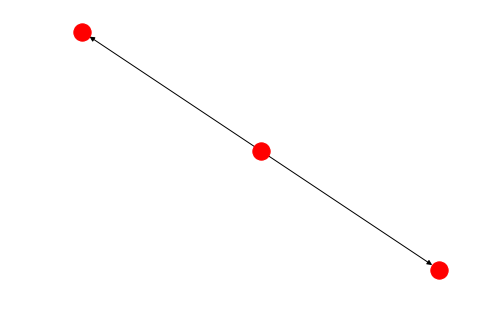

In [74]:
nx.draw(G)
plt.show()